# **Analyse 3**

## Merkmal 2 - Zeitbezüge innerhalb der Vorgänge

### Strategie & Fokus

- Untersuchung der Datumszusammenhänge
- Anlage von Datumsangaben:
    1. ``ErstellungsDatum``
    1. ``VorgangsDatum`` (Plan)
    1. ``Arbeitsbeginn``
    1. ``ErledigungsDatum``

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
# load dataset
FILE_PATH = '01_2_Rohdaten_neu/Export4.csv'
date_cols = ['VorgangsDatum', 'ErledigungsDatum', 'Arbeitsbeginn', 'ErstellungsDatum']
raw = pd.read_csv(filepath_or_buffer=FILE_PATH, sep=';', encoding='cp1252', parse_dates=date_cols, dayfirst=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129020 entries, 0 to 129019
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   VorgangsID               129020 non-null  int64         
 1   ObjektID                 129020 non-null  int64         
 2   HObjektText              129003 non-null  object        
 3   ObjektArtID              129020 non-null  int64         
 4   ObjektArtText            128372 non-null  object        
 5   VorgangsTypID            129020 non-null  int64         
 6   VorgangsTypName          129020 non-null  object        
 7   VorgangsDatum            129020 non-null  datetime64[ns]
 8   VorgangsStatusId         129020 non-null  int64         
 9   VorgangsPrioritaet       129020 non-null  int64         
 10  VorgangsBeschreibung     124087 non-null  object        
 11  VorgangsOrt              507 non-null     object        
 12  VorgangsArtText 

In [4]:
raw.head()

VorgangsID  ObjektID                                  HObjektText  \
0          11       114  427 C , Webmaschine, DL 280 EMS Breite 280    
1          17       124  621 C , Webmaschine, DL 280 EMS Breite 280    
2          53       244               285 C, Webmaschine, SG 220 EMS   
3          58       257                 107, Webmaschine, OM 220 EOS   
4          81       138                     00138, Schärmaschine 9,    

   ObjektArtID        ObjektArtText  VorgangsTypID            VorgangsTypName  \
0            3     Luft-Webmaschine              3  Reparaturauftrag (Portal)   
1            3     Luft-Webmaschine              3  Reparaturauftrag (Portal)   
2            5  Greifer-Webmaschine              3  Reparaturauftrag (Portal)   
3            3     Luft-Webmaschine              3  Reparaturauftrag (Portal)   
4           16        Schärmaschine              3  Reparaturauftrag (Portal)   

  VorgangsDatum  VorgangsStatusId  VorgangsPrioritaet  \
0    2019-03-06                 4                   0   
1    2019-03-11                 5                   0   
2    2019-03-19                 5                   0   
3    2019-03-21                 5                   0   
4    2019-03-25                 5                   0   

                       VorgangsBeschreibung VorgangsOrt  \
0                                       NaN         NaN   
1                                       NaN         NaN   
2                         Kupplung schleift         NaN   
3             Gegengewicht wieder anbringen         NaN   
4  da ist etwas gebrochen. (Herr Heininger)         NaN   

                                     VorgangsArtText ErledigungsDatum  \
0                                    Kettbaum kaputt       2019-03-06   
1                                            asgasdg       2019-03-11   
2                                    Kupplung defekt       2019-03-20   
3         Gegengewicht an der Webmaschine abgefallen       2019-03-21   
4  zentrale Bremsenverstellung linke Gatterseite ...       2019-03-25   

  ErledigungsArtText                            ErledigungsBeschreibung  \
0                NaN                                                NaN   
1                NaN                                                NaN   
2      Reparatur UTT                                                NaN   
3      Reparatur UTT  Schraube ausgebohrt\nGegengewicht wieder angeb...   
4      Reparatur UTT  Bolzen gebrochen. Bolzen neu angefertig und di...   

  MPMelderArbeitsplatz MPAbteilungBezeichnung Arbeitsbeginn ErstellungsDatum  
0              Weberei                Weberei           NaT       2019-03-06  
1     Elektrowerkstatt       Elektrowerkstatt           NaT       2019-03-11  
2              Weberei                Weberei           NaT       2019-03-19  
3              Weberei                Weberei    2019-03-21       2019-03-21  
4              Vorwerk                Vorwerk    2019-03-25       2019-03-25

In [5]:
print(f"Anzahl Features: {len(raw.columns)}")

Anzahl Features: 20


### Duplikate

In [6]:
duplicates_filt = raw.duplicated()

In [7]:
print(f"Anzahl Duplikate: {duplicates_filt.sum()}")

Anzahl Duplikate: 84


In [8]:
filt_data = raw[duplicates_filt]
uni_obj_id_dupl = filt_data['ObjektID'].unique()

In [9]:
print(f"Anzahl einzigartiger Objekt-IDs unter Duplikaten: {len(uni_obj_id_dupl)}")

Anzahl einzigartiger Objekt-IDs unter Duplikaten: 47


In [10]:
wo_duplicates = raw.drop_duplicates(ignore_index=True)
wo_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128936 entries, 0 to 128935
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   VorgangsID               128936 non-null  int64         
 1   ObjektID                 128936 non-null  int64         
 2   HObjektText              128920 non-null  object        
 3   ObjektArtID              128936 non-null  int64         
 4   ObjektArtText            128289 non-null  object        
 5   VorgangsTypID            128936 non-null  int64         
 6   VorgangsTypName          128936 non-null  object        
 7   VorgangsDatum            128936 non-null  datetime64[ns]
 8   VorgangsStatusId         128936 non-null  int64         
 9   VorgangsPrioritaet       128936 non-null  int64         
 10  VorgangsBeschreibung     124008 non-null  object        
 11  VorgangsOrt              507 non-null     object        
 12  VorgangsArtText 

### NA vals

In [14]:
date_cols

['VorgangsDatum', 'ErledigungsDatum', 'Arbeitsbeginn', 'ErstellungsDatum']

In [16]:
for col in date_cols:
    na_count = wo_duplicates[col].isna().sum()
    rel_count = na_count / len(wo_duplicates)
    print(f'Feature {col}: number of NA vals {na_count}, relative {rel_count:.2%}')

Feature VorgangsDatum: number of NA vals 0, relative 0.00%
Feature ErledigungsDatum: number of NA vals 0, relative 0.00%
Feature Arbeitsbeginn: number of NA vals 5456, relative 4.23%
Feature ErstellungsDatum: number of NA vals 0, relative 0.00%


In [34]:
wo_na = wo_duplicates.dropna(how='any', subset=date_cols).reset_index(drop=True)

In [35]:
wo_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123480 entries, 0 to 123479
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   VorgangsID               123480 non-null  int64         
 1   ObjektID                 123480 non-null  int64         
 2   HObjektText              123464 non-null  object        
 3   ObjektArtID              123480 non-null  int64         
 4   ObjektArtText            122932 non-null  object        
 5   VorgangsTypID            123480 non-null  int64         
 6   VorgangsTypName          123480 non-null  object        
 7   VorgangsDatum            123480 non-null  datetime64[ns]
 8   VorgangsStatusId         123480 non-null  int64         
 9   VorgangsPrioritaet       123480 non-null  int64         
 10  VorgangsBeschreibung     120389 non-null  object        
 11  VorgangsOrt              445 non-null     object        
 12  VorgangsArtText 

#### Unlogische Einträge

- nach Prozessablauf Datumsangaben, die in anderer chronologischer Reihenfolge erscheinen

In [115]:
# Planung des Vorgangs vor Erstellung
matches = (wo_na['VorgangsDatum'] < wo_na['ErstellungsDatum']).sum()
print(f'Planung vor Erstellung, Treffer {matches}')

# Arbeitsbeginn vor Erstellung
matches = (wo_na['Arbeitsbeginn'] < wo_na['ErstellungsDatum']).sum()
print(f'Arbeitsbeginn vor Erstellung, Treffer {matches}')

# Arbeitsbeginn vor Planung
matches = (wo_na['Arbeitsbeginn'] < wo_na['VorgangsDatum']).sum()
print(f'Arbeitsbeginn vor Planung, Treffer {matches}')

# Erledigung vor Erstellung
matches = (wo_na['ErledigungsDatum'] < wo_na['ErstellungsDatum']).sum()
print(f'Erledigung vor Erstellung, Treffer {matches}')

# Erledigung vor Planung
matches = (wo_na['ErledigungsDatum'] < wo_na['VorgangsDatum']).sum()
print(f'Erledigung vor Planung, Treffer {matches}')

# Erledigung vor Arbeitsbeginn
matches = (wo_na['ErledigungsDatum'] < wo_na['Arbeitsbeginn']).sum()
print(f'Erledigung vor Arbeitsbeginn, Treffer {matches}')

Planung vor Erstellung, Treffer 3966
Arbeitsbeginn vor Erstellung, Treffer 4118
Arbeitsbeginn vor Planung, Treffer 9356
Erledigung vor Erstellung, Treffer 3681
Erledigung vor Planung, Treffer 8142
Erledigung vor Arbeitsbeginn, Treffer 1


In [125]:
filter_illogical = (
    (wo_na['VorgangsDatum'] < wo_na['ErstellungsDatum']) |
    (wo_na['Arbeitsbeginn'] < wo_na['ErstellungsDatum']) |
    (wo_na['Arbeitsbeginn'] < wo_na['VorgangsDatum']) |
    (wo_na['ErledigungsDatum'] < wo_na['ErstellungsDatum']) |
    (wo_na['ErledigungsDatum'] < wo_na['VorgangsDatum']) |
    (wo_na['ErledigungsDatum'] < wo_na['Arbeitsbeginn'])
)
print(f'Number of illogical entries: {filter_illogical.sum()}')

Number of illogical entries: 13215


In [131]:
logical = wo_na.loc[~filter_illogical,:].reset_index(drop=True)

In [132]:
logical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110265 entries, 0 to 110264
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   VorgangsID               110265 non-null  int64         
 1   ObjektID                 110265 non-null  int64         
 2   HObjektText              110252 non-null  object        
 3   ObjektArtID              110265 non-null  int64         
 4   ObjektArtText            109788 non-null  object        
 5   VorgangsTypID            110265 non-null  int64         
 6   VorgangsTypName          110265 non-null  object        
 7   VorgangsDatum            110265 non-null  datetime64[ns]
 8   VorgangsStatusId         110265 non-null  int64         
 9   VorgangsPrioritaet       110265 non-null  int64         
 10  VorgangsBeschreibung     108683 non-null  object        
 11  VorgangsOrt              441 non-null     object        
 12  VorgangsArtText 

### Date Diffs

- Differenzen von:
    - VorgangsDatum und Arbeitsbeginn (Plan zu Ist)
    - Arbeitsbeginn zu ErledigungsDatum (Dauer im Ist)

#### Planabweichungen

In [137]:
logical.head()

VorgangsID  ObjektID                     HObjektText  ObjektArtID  \
0          58       257    107, Webmaschine, OM 220 EOS            3   
1          81       138        00138, Schärmaschine 9,            16   
2          82         0            Warenschau allgemein            0   
3          76         0                  Neben der Türe            0   
4         111       241  294 C, Webmaschine, SG 240 EMS            5   

         ObjektArtText  VorgangsTypID            VorgangsTypName  \
0     Luft-Webmaschine              3  Reparaturauftrag (Portal)   
1        Schärmaschine              3  Reparaturauftrag (Portal)   
2                  NaN              3  Reparaturauftrag (Portal)   
3                  NaN              3  Reparaturauftrag (Portal)   
4  Greifer-Webmaschine              3  Reparaturauftrag (Portal)   

  VorgangsDatum  VorgangsStatusId  VorgangsPrioritaet  \
0    2019-03-21                 5                   0   
1    2019-03-25                 5                   0   
2    2019-03-25                 5                   0   
3    2019-03-22                 5                   0   
4    2019-04-01                 5                   0   

                          VorgangsBeschreibung           VorgangsOrt  \
0                Gegengewicht wieder anbringen                   NaN   
1     da ist etwas gebrochen. (Herr Heininger)                   NaN   
2             Klappbügel Portalkran H31 defekt  Warenschau allgemein   
3                         Schraube nix mer gut        Neben der Türe   
4  KBK tauschen\nUrsache vermutlich mechanisch                   NaN   

                                     VorgangsArtText ErledigungsDatum  \
0         Gegengewicht an der Webmaschine abgefallen       2019-03-21   
1  zentrale Bremsenverstellung linke Gatterseite ...       2019-03-25   
2                      Allgemeine Reparaturarbeiten        2019-03-25   
3                                           Kettbaum       2019-03-25   
4                         Kupplung-Brems-Kombination       2019-04-08   

  ErledigungsArtText                            ErledigungsBeschreibung  \
0      Reparatur UTT  Schraube ausgebohrt\nGegengewicht wieder angeb...   
1      Reparatur UTT  Bolzen gebrochen. Bolzen neu angefertig und di...   
2      Reparatur UTT                                 Feder ausgetauscht   
3      Reparatur UTT  Schrauben ausgebohrt\t\nGewinde nachgeschnitten\t   
4      Reparatur UTT  da derzeit Keine Ersatzteile da Reparatur mit ...   

  MPMelderArbeitsplatz MPAbteilungBezeichnung Arbeitsbeginn ErstellungsDatum  
0              Weberei                Weberei    2019-03-21       2019-03-21  
1              Vorwerk                Vorwerk    2019-03-25       2019-03-25  
2           Warenschau             Warenschau    2019-03-25       2019-03-25  
3              Vorwerk                Vorwerk    2019-03-25       2019-03-22  
4              Weberei                Weberei    2019-04-02       2019-04-01

In [138]:
MAX_DATE_DIFF = 1000

In [142]:
date_diff = logical['Arbeitsbeginn'] - logical['VorgangsDatum']
date_diff = date_diff.to_frame()
date_diff.columns = ['date_diff']
date_diff['days'] = date_diff['date_diff'].apply(lambda x: x.days)
date_diff = date_diff.loc[((date_diff['days'] <= MAX_DATE_DIFF) & 
                           (date_diff['days'] >= -MAX_DATE_DIFF)), :]
#date_diff = date_diff.reset_index(drop=True)
date_diff.head()

date_diff  days
0    0 days     0
1    0 days     0
2    0 days     0
3    3 days     3
4    1 days     1

In [143]:
date_diff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110265 entries, 0 to 110264
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype          
---  ------     --------------   -----          
 0   date_diff  110265 non-null  timedelta64[ns]
 1   days       110265 non-null  int64          
dtypes: int64(1), timedelta64[ns](1)
memory usage: 2.5 MB


In [144]:
date_diff['days'].describe()

count    110265.000000
mean          0.994939
std           6.599087
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         392.000000
Name: days, dtype: float64

In [146]:
date_diff.loc[date_diff['days'] > 300]

date_diff  days
296     392 days   392
5982    358 days   358
109336  303 days   303

In [147]:
logical.loc[296,:]

VorgangsID                                                            136387
ObjektID                                                                1820
HObjektText                      01821, Phenolphtaleinindikatorlösung 0,1%, 
ObjektArtID                                                              105
ObjektArtText                                           Chemische Prüfmittel
VorgangsTypID                                                              1
VorgangsTypName                                                      Wartung
VorgangsDatum                                            2022-02-28 00:00:00
VorgangsStatusId                                                           5
VorgangsPrioritaet                                                         0
VorgangsBeschreibung       Jährliche Kontrolle des Mindeshaltbarkeitsdatum\n
VorgangsOrt                                                              NaN
VorgangsArtText                               Prüfmittelüberwachung jährlich

<Axes: xlabel='days', ylabel='Density'>

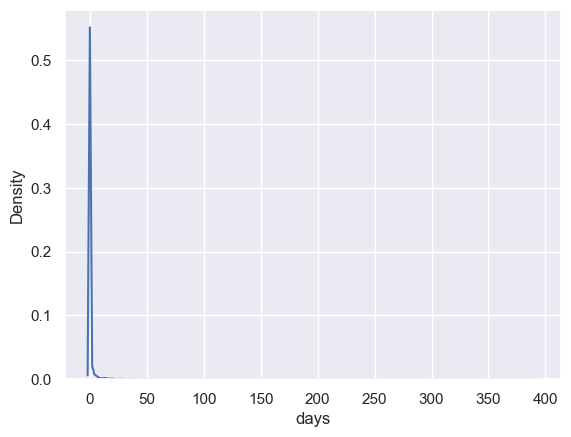

In [145]:
sns.kdeplot(data=date_diff, x='days')

#### Ist-Dauer

In [156]:
logical.head()

VorgangsID  ObjektID                     HObjektText  ObjektArtID  \
0          58       257    107, Webmaschine, OM 220 EOS            3   
1          81       138        00138, Schärmaschine 9,            16   
2          82         0            Warenschau allgemein            0   
3          76         0                  Neben der Türe            0   
4         111       241  294 C, Webmaschine, SG 240 EMS            5   

         ObjektArtText  VorgangsTypID            VorgangsTypName  \
0     Luft-Webmaschine              3  Reparaturauftrag (Portal)   
1        Schärmaschine              3  Reparaturauftrag (Portal)   
2                  NaN              3  Reparaturauftrag (Portal)   
3                  NaN              3  Reparaturauftrag (Portal)   
4  Greifer-Webmaschine              3  Reparaturauftrag (Portal)   

  VorgangsDatum  VorgangsStatusId  VorgangsPrioritaet  \
0    2019-03-21                 5                   0   
1    2019-03-25                 5                   0   
2    2019-03-25                 5                   0   
3    2019-03-22                 5                   0   
4    2019-04-01                 5                   0   

                          VorgangsBeschreibung           VorgangsOrt  \
0                Gegengewicht wieder anbringen                   NaN   
1     da ist etwas gebrochen. (Herr Heininger)                   NaN   
2             Klappbügel Portalkran H31 defekt  Warenschau allgemein   
3                         Schraube nix mer gut        Neben der Türe   
4  KBK tauschen\nUrsache vermutlich mechanisch                   NaN   

                                     VorgangsArtText ErledigungsDatum  \
0         Gegengewicht an der Webmaschine abgefallen       2019-03-21   
1  zentrale Bremsenverstellung linke Gatterseite ...       2019-03-25   
2                      Allgemeine Reparaturarbeiten        2019-03-25   
3                                           Kettbaum       2019-03-25   
4                         Kupplung-Brems-Kombination       2019-04-08   

  ErledigungsArtText                            ErledigungsBeschreibung  \
0      Reparatur UTT  Schraube ausgebohrt\nGegengewicht wieder angeb...   
1      Reparatur UTT  Bolzen gebrochen. Bolzen neu angefertig und di...   
2      Reparatur UTT                                 Feder ausgetauscht   
3      Reparatur UTT  Schrauben ausgebohrt\t\nGewinde nachgeschnitten\t   
4      Reparatur UTT  da derzeit Keine Ersatzteile da Reparatur mit ...   

  MPMelderArbeitsplatz MPAbteilungBezeichnung Arbeitsbeginn ErstellungsDatum  
0              Weberei                Weberei    2019-03-21       2019-03-21  
1              Vorwerk                Vorwerk    2019-03-25       2019-03-25  
2           Warenschau             Warenschau    2019-03-25       2019-03-25  
3              Vorwerk                Vorwerk    2019-03-25       2019-03-22  
4              Weberei                Weberei    2019-04-02       2019-04-01

In [157]:
MAX_DATE_DIFF = 1000

In [158]:
date_diff = logical['ErledigungsDatum'] - logical['Arbeitsbeginn']
date_diff = date_diff.to_frame()
date_diff.columns = ['date_diff']
date_diff['days'] = date_diff['date_diff'].apply(lambda x: x.days)
date_diff = date_diff.loc[((date_diff['days'] <= MAX_DATE_DIFF) & 
                           (date_diff['days'] >= -MAX_DATE_DIFF)), :]
#date_diff = date_diff.reset_index(drop=True)
date_diff.head()

date_diff  days
0    0 days     0
1    0 days     0
2    0 days     0
3    0 days     0
4    6 days     6

In [159]:
date_diff.describe()

date_diff           days
count                     110265  110265.000000
mean   0 days 04:03:16.283498843       0.168938
std    3 days 09:12:15.416163344       3.383512
min              0 days 00:00:00       0.000000
25%              0 days 00:00:00       0.000000
50%              0 days 00:00:00       0.000000
75%              0 days 00:00:00       0.000000
max            486 days 00:00:00     486.000000

In [160]:
date_diff.loc[date_diff['days'] > 300]

date_diff  days
106054  486 days   486

In [161]:
logical.loc[106054,:]

VorgangsID                                                             65407
ObjektID                                                                  55
HObjektText                503 C , Webmaschine, DL 280 EMS Breite 280 Bj....
ObjektArtID                                                                3
ObjektArtText                                               Luft-Webmaschine
VorgangsTypID                                                              3
VorgangsTypName                                    Reparaturauftrag (Portal)
VorgangsDatum                                            2020-11-19 00:00:00
VorgangsStatusId                                                           5
VorgangsPrioritaet                                                         0
VorgangsBeschreibung       Schaltschrank ausrichten ist angefahren worden...
VorgangsOrt                                                              NaN
VorgangsArtText                                       Maschineninfrastruktur

<Axes: xlabel='days', ylabel='Density'>

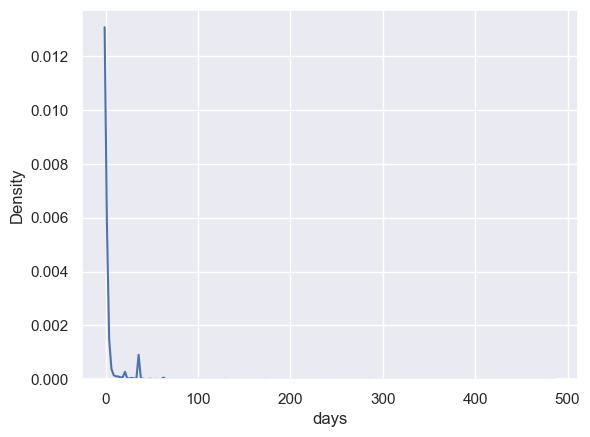

In [162]:
sns.kdeplot(data=date_diff, x='days')